In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
tickers = ['NVDA', 'APP', 'VST', 'VRT', 'MSTR', 'CVNA', 'COHR', 'NTRA', 'FTAI',
           'AUR', 'ASTS', 'MOD', 'ZETA', 'PI', 'LUMN', 'BMA', 'HIMS', 'OSCR', 
           'SG', 'DYN', 'EWTX', 'POWL', 'SRRK', 'EVGO', 'RSI', 'CLOV', 'PLTR', 'RBLX', 
           'SNOW', 'UPST', 'TSLA', 'SHOP', 'SQ', 'MDB', 'DDOG', 'NET', 'CRWD', 
           'ZS', 'PATH', 'FVRR', 'SE', 'CRSP', 'PYPL', 'NFLX', 'AMD', 'INTC', 
           'DIS', 'BA', 'CSCO', 'IBM']
data = yf.download(tickers, start='2023-01-01', end='2024-05-01')['Adj Close']


returns = data.pct_change().dropna()
print(returns)

[*********************100%***********************]  50 of 50 completed

Ticker                          AMD       APP      ASTS       AUR        BA  \
Date                                                                          
2023-01-04 00:00:00+00:00  0.009997  0.015843  0.031390  0.077586  0.042223   
2023-01-05 00:00:00+00:00 -0.036035 -0.096330 -0.013043 -0.080000  0.006629   
2023-01-06 00:00:00+00:00  0.026151 -0.013198  0.046256  0.060870  0.039075   
2023-01-09 00:00:00+00:00  0.051282  0.047325  0.006316  0.057377 -0.020798   
2023-01-10 00:00:00+00:00  0.012046  0.018664  0.020920 -0.007752 -0.009014   
...                             ...       ...       ...       ...       ...   
2024-04-24 00:00:00+00:00 -0.003481 -0.020861 -0.004651 -0.003509 -0.028668   
2024-04-25 00:00:00+00:00  0.013312 -0.007030  0.023364 -0.007042  0.015092   
2024-04-26 00:00:00+00:00  0.023673  0.066609  0.018265  0.070922  0.002458   
2024-04-29 00:00:00+00:00  0.017789 -0.011244  0.044843  0.009934  0.037496   
2024-04-30 00:00:00+00:00 -0.011361 -0.033155 -0.051

In [8]:

mean_returns = returns.mean().values  # Convert to a NumPy array
cov_matrix = returns.cov().values  # Convert to a NumPy array for consistency


n_assets = len(tickers)


weights = cp.Variable(n_assets)
print(cov_matrix)


portfolio_risk = cp.quad_form(weights, cov_matrix)
print(f"portfolio risk{portfolio_risk}")


constraints = [
    cp.sum(weights) == 1,  # Weights must sum to 1
    mean_returns @ weights >= 0.005,  # Minimum expected return (optional)
    weights >= -1,  # Allow no short-selling (you can change this if needed)
    weights <= 0.5   # Weights cannot exceed 1
]


problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)


problem.solve()

optimal_weights = weights.value

print("Optimal Weights:", optimal_weights)
print("Problem status:", problem.status)
print("Mean Returns:", mean_returns)


[[9.26948913e-04 3.07369412e-04 2.52065972e-04 ... 1.17356905e-04
  1.80047470e-04 3.88828344e-04]
 [3.07369412e-04 1.75431667e-03 2.69954995e-04 ... 1.02240857e-04
  2.73069035e-04 4.58564033e-04]
 [2.52065972e-04 2.69954995e-04 3.20588447e-03 ... 6.33166131e-05
  2.31090170e-04 2.35905364e-04]
 ...
 [1.17356905e-04 1.02240857e-04 6.33166131e-05 ... 4.25275589e-04
  3.55602835e-05 6.72786234e-05]
 [1.80047470e-04 2.73069035e-04 2.31090170e-04 ... 3.55602835e-05
  9.89439247e-04 3.15320897e-04]
 [3.88828344e-04 4.58564033e-04 2.35905364e-04 ... 6.72786234e-05
  3.15320897e-04 9.83675464e-04]]
portfolio riskQuadForm(var1, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]])
Optimal Weights: [-0.0878939   0.08196017 -0.01546795  0.01372484 -0.02544672  0.04681543
 -0.0334796  -0.05313675 -0.03945238  0.10922058  0.19961851  0.03538801
 -0.00377565  0.08206581  0.01079536 -0.04477413  0.02404724  0.13401424
 -0.00923684  0.0021

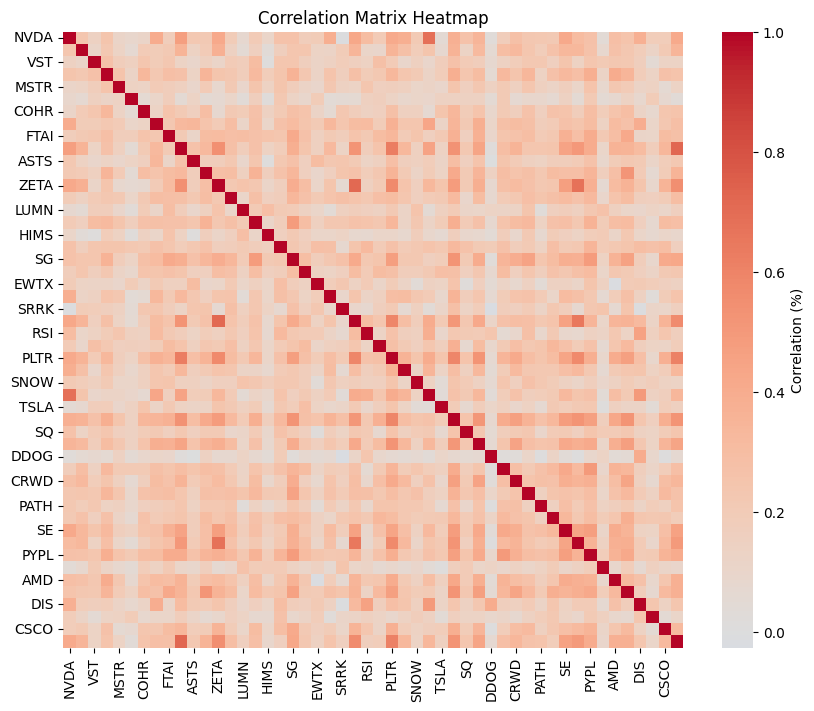

In [9]:

corr_matrix = returns.corr() * 100  # Convert to percentage


std_devs = np.sqrt(np.diag(cov_matrix))


correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)


correlation_df = pd.DataFrame(correlation_matrix, index=tickers, columns=tickers)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=False, fmt=".2%", cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation (%)'})
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:


std_devs = np.sqrt(np.diag(cov_matrix))


correlation_matrix = cov_matrix / np.outer(std_devs, std_devs)


correlation_df = pd.DataFrame(correlation_matrix)
print(correlation_df)

          0         1         2         3         4         5         6   \
0   1.000000  0.241034  0.146222  0.246085  0.110034  0.087536  0.115112   
1   0.241034  1.000000  0.113832  0.224069  0.127751  0.071578  0.199701   
2   0.146222  0.113832  1.000000  0.270114  0.174507  0.155065  0.240887   
3   0.246085  0.224069  0.270114  1.000000  0.253237  0.119432  0.333397   
4   0.110034  0.127751  0.174507  0.253237  1.000000  0.137782  0.131480   
5   0.087536  0.071578  0.155065  0.119432  0.137782  1.000000  0.062700   
6   0.115112  0.199701  0.240887  0.333397  0.131480  0.062700  1.000000   
7   0.403585  0.194850  0.196831  0.220086  0.204164  0.108090  0.130645   
8   0.179437  0.214943  0.230961  0.289862  0.177873  0.174269  0.257305   
9   0.471711  0.352944  0.126822  0.267835  0.155829  0.056822  0.213778   
10  0.224208  0.135608  0.098347  0.133075  0.097890  0.129669  0.162065   
11  0.217801  0.202316  0.155733  0.342556  0.205838  0.056716  0.290255   
12  0.418779

In [11]:
print("Weights Variable Shape:", weights.shape)
print("Covariance Matrix Shape:", cov_matrix.shape)

print(cov_matrix)

Weights Variable Shape: (50,)
Covariance Matrix Shape: (50, 50)
[[9.26948913e-04 3.07369412e-04 2.52065972e-04 ... 1.17356905e-04
  1.80047470e-04 3.88828344e-04]
 [3.07369412e-04 1.75431667e-03 2.69954995e-04 ... 1.02240857e-04
  2.73069035e-04 4.58564033e-04]
 [2.52065972e-04 2.69954995e-04 3.20588447e-03 ... 6.33166131e-05
  2.31090170e-04 2.35905364e-04]
 ...
 [1.17356905e-04 1.02240857e-04 6.33166131e-05 ... 4.25275589e-04
  3.55602835e-05 6.72786234e-05]
 [1.80047470e-04 2.73069035e-04 2.31090170e-04 ... 3.55602835e-05
  9.89439247e-04 3.15320897e-04]
 [3.88828344e-04 4.58564033e-04 2.35905364e-04 ... 6.72786234e-05
  3.15320897e-04 9.83675464e-04]]


weights = cp.Variable(n_assets)
This creates a CVXPY variable representing the portfolio weights.
CVXPY Variable: A decision variable for the optimization problem. Each entry in weights corresponds to the proportion of the portfolio invested in a specific stock.
The number of variables (i.e., the number of weights) is equal to n_assets.


portfolio_risk = cp.quad_form(weights, cov_matrix)

portfolio_risk:
This calculates the risk of the portfolio, which is the variance of the portfolio's return.
cp.quad_form: This is a special function in CVXPY that calculates the quadratic form of the covariance matrix and the portfolio weights, which gives the portfolio's variance (or risk).
The risk formula used here is:
Risk=𝑤𝑇Σ𝑤

where:
w are the portfolio weights (the decision variable),
Σ is the covariance matrix of the asset returns.


constraints = [cp.sum(weights) == 1, mean_returns @ weights >= 0.01, weights >= 0, weights <= 1]
cp.sum(weights) == 1:
This ensures that the sum of all portfolio weights equals 1. In other words, the entire portfolio must be fully invested (no money is left uninvested).
mean_returns @ weights >= 0.01:
This constraint ensures that the portfolio’s expected return is at least 0.01 (or 1%). It uses matrix multiplication between the expected returns (mean_returns) and the portfolio weights (weights).
weights >= 0, weights <= 1:
These constraints enforce that the portfolio weights must be between 0 and 1 for each stock. This ensures no short selling (negative weights) or over-investment in any one asset (weights exceeding 1).


problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
problem.solve()
cp.Problem:
This defines the optimization problem. The goal is to minimize the portfolio risk (portfolio_risk), subject to the specified constraints (constraints).
problem.solve():
This solves the optimization problem using an appropriate solver (automatically selected by CVXPY). It finds the set of portfolio weights that minimizes risk while satisfying the constraints.

optimal_weights = weights.value
print("Optimal Weights:", optimal_weights)
weights.value:
After solving the problem, the .value attribute of weights contains the optimal portfolio weights (the fractions of the portfolio allocated to each stock).
print("Optimal Weights:", optimal_weights):
This simply prints out the optimal weights for each asset in the portfolio. These weights are the result of the optimization, representing the best balance between risk and return.

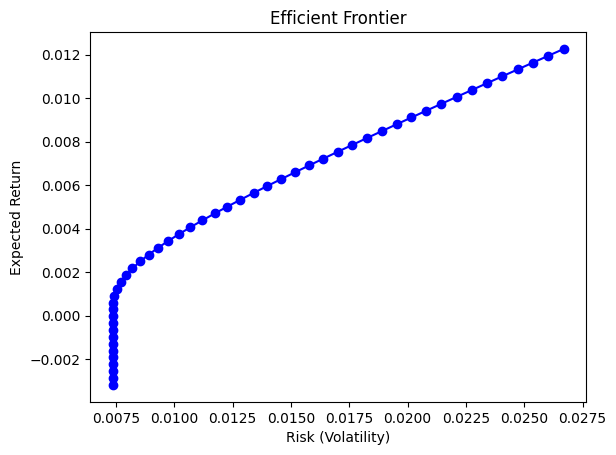

In [12]:

target_returns = np.linspace(min(mean_returns), max(mean_returns), 50)

risks = []
for target_return in target_returns:
    constraints = [cp.sum(weights) == 1, mean_returns @ weights >= target_return]
    problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
    problem.solve()
    risks.append(np.sqrt(portfolio_risk.value))


plt.plot(risks, target_returns, 'b-o')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()


In [13]:
print("Optimal Weights:", optimal_weights)


Optimal Weights: [-0.0878939   0.08196017 -0.01546795  0.01372484 -0.02544672  0.04681543
 -0.0334796  -0.05313675 -0.03945238  0.10922058  0.19961851  0.03538801
 -0.00377565  0.08206581  0.01079536 -0.04477413  0.02404724  0.13401424
 -0.00923684  0.0021009   0.22061102  0.02487752 -0.0547898  -0.03192919
  0.05368035  0.03734569 -0.0466738   0.01443528  0.07668129  0.12389595
  0.05450454 -0.06341626  0.00038947  0.01845529  0.03807411 -0.02594434
  0.01885947 -0.00520437 -0.01584921 -0.03473455  0.0387656  -0.02265867
 -0.09695375  0.020832    0.02529952 -0.00615321 -0.01209273  0.19039821
  0.03644916 -0.00424175]


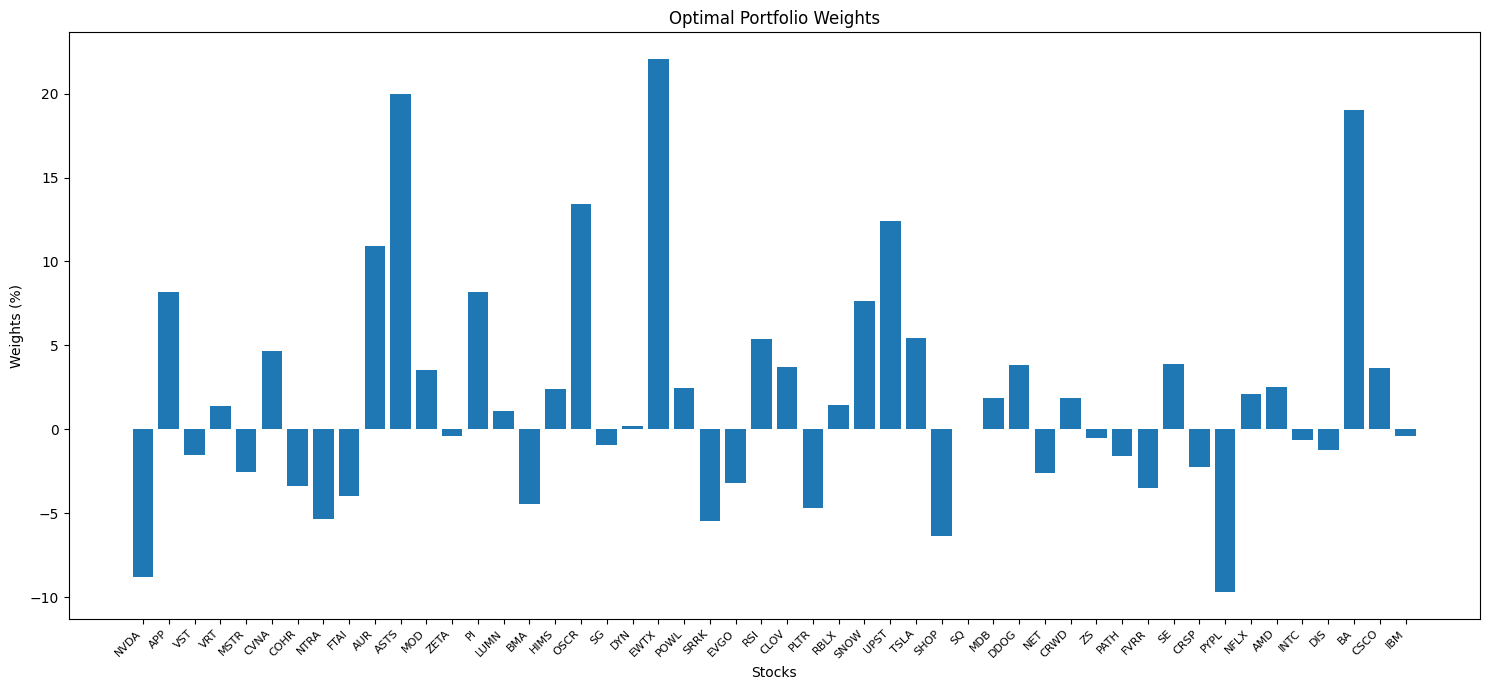

In [14]:

percentage_weights = optimal_weights * 100

plt.figure(figsize=(15, 7))  # Make the figure wider

plt.bar(tickers, percentage_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights (%)')  # Update y-axis label to indicate percentage
plt.title('Optimal Portfolio Weights')

plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust horizontal alignment and font size

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

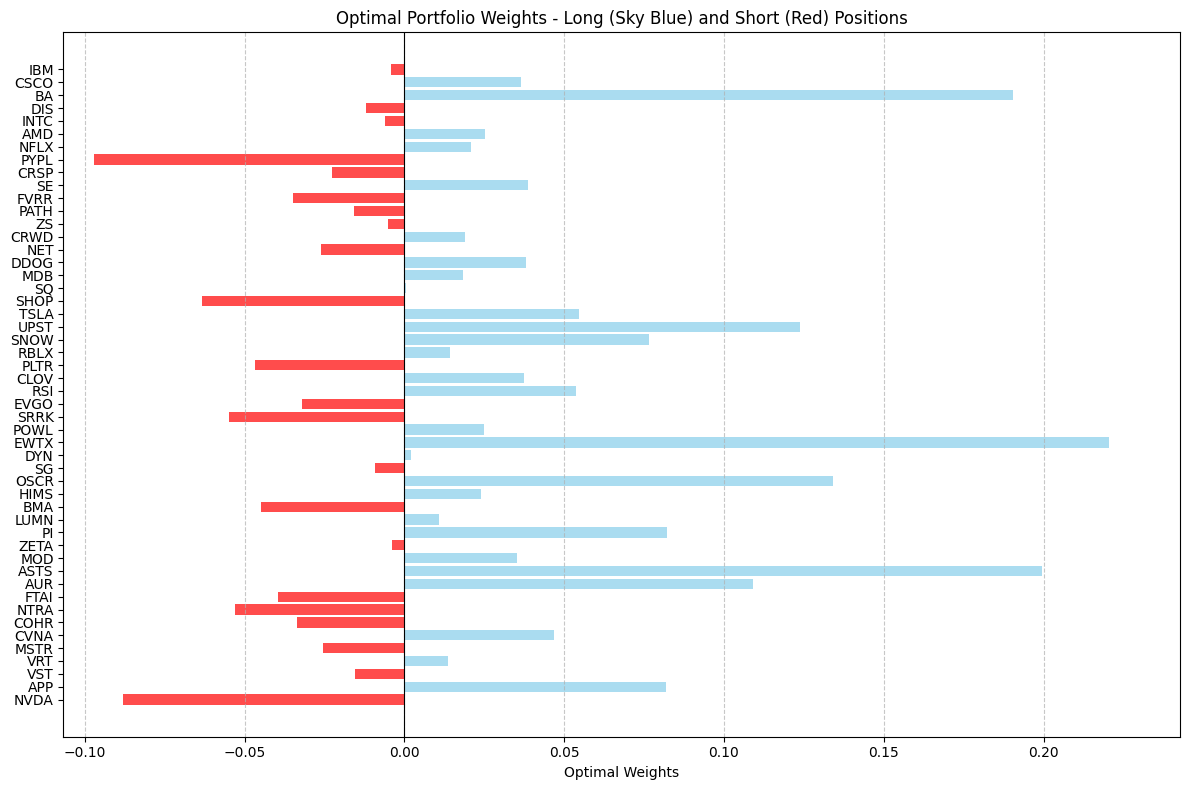

In [15]:

colors = ['skyblue' if weight >= 0 else 'red' for weight in optimal_weights]


plt.figure(figsize=(12, 8))


plt.barh(tickers, optimal_weights, color=colors, alpha=0.7)


plt.xlim(min(optimal_weights) * 1.1, max(optimal_weights) * 1.1)


plt.xlabel('Optimal Weights')
plt.title('Optimal Portfolio Weights - Long (Sky Blue) and Short (Red) Positions')


plt.axvline(0, color='black', lw=0.8)


plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout
plt.show()

In [16]:

risk_free_rate = 0.04


portfolio_return = np.dot(optimal_weights, mean_returns) * 333  # 333 trading days


portfolio_volatility = np.sqrt(cp.quad_form(optimal_weights, cov_matrix).value) * np.sqrt(333)

sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

print(f"Annualized Portfolio Return: {portfolio_return:.4f}")
print(f"Annualized Portfolio Volatility: {portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Annualized Portfolio Return: 1.6650
Annualized Portfolio Volatility: 0.2235
Sharpe Ratio: 7.2721


Date
2024-04-24 00:00:00+00:00    0.544213
2024-04-25 00:00:00+00:00    0.572248
2024-04-26 00:00:00+00:00    0.564321
2024-04-29 00:00:00+00:00    0.565553
2024-04-30 00:00:00+00:00    0.527684
dtype: float64


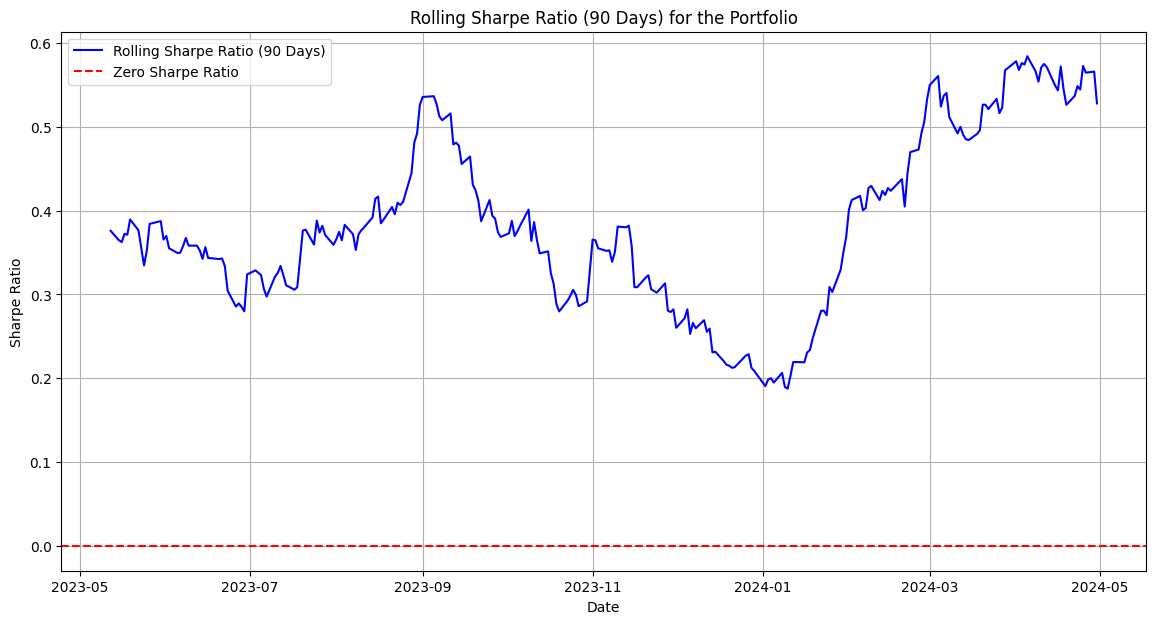

In [17]:
returns = data.pct_change().dropna()

risk_free_rate = 0.044  # Example: 1% annual risk-free rate
daily_risk_free_rate = risk_free_rate / 252  # Convert to daily rate
portfolio_returns = (returns * optimal_weights).sum(axis=1)

rolling_mean = portfolio_returns.rolling(window=90).mean()
rolling_std = portfolio_returns.rolling(window=90).std()

rolling_sharpe_ratio = (rolling_mean - daily_risk_free_rate) / rolling_std

print(rolling_sharpe_ratio.tail())

plt.figure(figsize=(14, 7))
plt.plot(rolling_sharpe_ratio, label='Rolling Sharpe Ratio (90 Days)', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Sharpe Ratio')
plt.title('Rolling Sharpe Ratio (90 Days) for the Portfolio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.grid()
plt.show()

In [18]:
target_risk = 0.1  # Target portfolio volatility (10%)
n_assets = len(tickers)
weights = np.ones(n_assets) / n_assets

cov_matrix = returns.cov()

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Current Portfolio Volatility: {portfolio_volatility:.2%}")

if portfolio_volatility > target_risk:
    print("Rebalance the portfolio to reduce risk.")
else:
    print("Portfolio is within target risk tolerance.")

Current Portfolio Volatility: 1.86%
Portfolio is within target risk tolerance.


Length of rolling_volatility: 242
Length of returns.index[90:]: 242


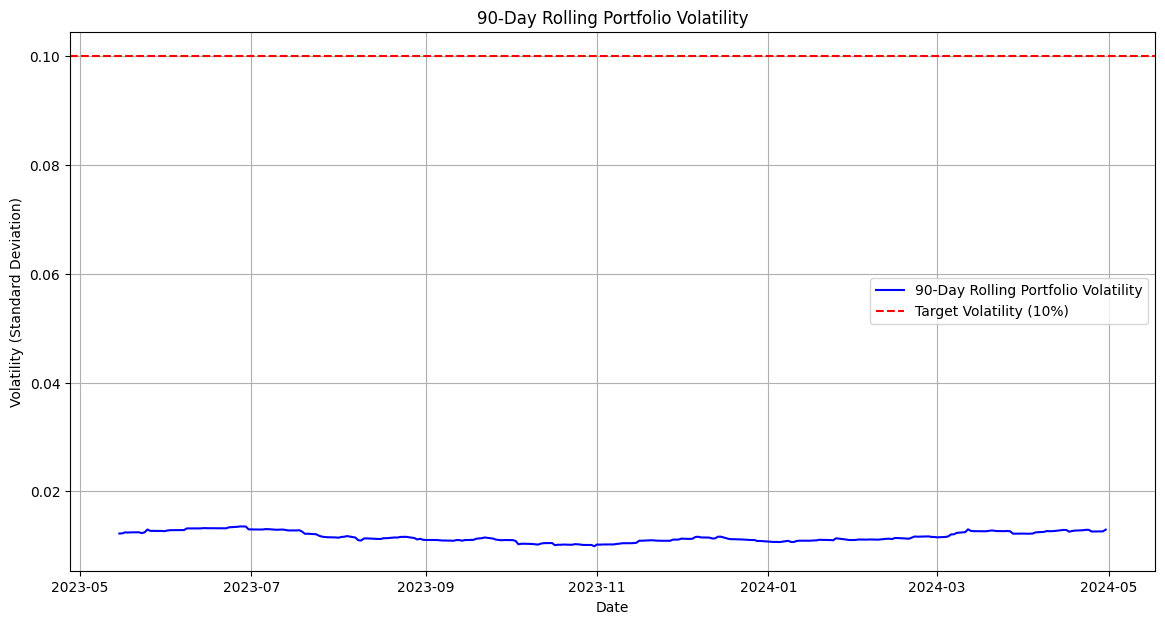

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rolling_covariance = returns.rolling(window=90).cov(pairwise=True)

rolling_volatility = []

n_returns = returns.shape[0]
n_assets = returns.shape[1]

for i in range(90, n_returns):  # Start from index 90 to ensure we have enough data for covariance
    current_cov = rolling_covariance.iloc[i*n_assets:(i+1)*n_assets]  # Extract the covariance matrix
    
    current_cov_matrix = current_cov.values.reshape(n_assets, n_assets)

    portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(current_cov_matrix, optimal_weights)))
    
    rolling_volatility.append(portfolio_volatility)

print("Length of rolling_volatility:", len(rolling_volatility))
print("Length of returns.index[90:]:", len(returns.index[90:]))


rolling_volatility_series = pd.Series(rolling_volatility, index=returns.index[90:90 + len(rolling_volatility)])

plt.figure(figsize=(14, 7))
plt.plot(rolling_volatility_series, label='90-Day Rolling Portfolio Volatility', color='blue')
plt.title('90-Day Rolling Portfolio Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.axhline(y=0.1, color='r', linestyle='--', label='Target Volatility (10%)')
plt.legend()
plt.grid()
plt.show()
